# Quality control (QC) and denoising of 16S rRNA V3-V4 amplicons with QIIME2 and DADA2

Contact person: Monica R. Ticlla <br>
Contact e-mail: mticlla@gmail.com, monicaroxana.ticllaccenhua@unibas.ch

**Summary:**

16S-rRNA-gene amplicon (V3-V4) sequencing (hereafter 16S-AS) reads were processed with QIIME2 plugins. Here, we performed quality inspection of paired-end sequences with  QIIME2's demux plugin, we further processed each pair with DADA2; we run the denoise-paired method of QIIME2's dada2 plugin, followed default parameter settings but adjusted the number of bases trimmed at the 5'- and 3'- ends.

In [ ]:
report_date = %env REPORT_DATE
print(report_date)

## 0. Set-up working environment

**Set-up working directory**

In [1]:
%%capture
cd ../

**Create additional directories**

In [2]:
mkdir -p ./data/interim/QIIME2/tz_spt_cases

**Import python modules**

In [9]:
#
from IPython.core.display import display, HTML
from zipfile import ZipFile
import pandas as pd
import matplotlib as mpl
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

## 1. Import datasets

**Import FastQ data**

In [4]:
%%bash
for i in `ls ./data/raw/tz_spt_cases/fastq_manifest_run*.tzv`;do basename "$i" .tsv;done

fastq_manifest_run1.tzv
fastq_manifest_run2.tzv
fastq_manifest_run3.tzv


In [5]:
%%bash

mkdir -p ./data/interim/QIIME2/tz_spt_cases/artifacts

ls ./data/raw/tz_spt_cases/fastq_manifest_run*.tzv | parallel \
    'tag="$(basename {} |cut -d. -f1 | cut -d_ -f3)"; \
    singularity exec \
        --bind ${GROUP} \
        --app QIIME2 ./containers/meta16S.sif \
        qiime tools import \
            --type "SampleData[PairedEndSequencesWithQuality]" \
            --input-path {} \
            --input-format PairedEndFastqManifestPhred33V2 \
            --output-path ./data/interim/QIIME2/tz_spt_cases/artifacts/demux-paired-end_${tag}.qza'

Imported ./data/raw/tz_spt_cases/fastq_manifest_run1.tzv as PairedEndFastqManifestPhred33V2 to ./data/interim/QIIME2/tz_spt_cases/artifacts/demux-paired-end_run1.qza
Imported ./data/raw/tz_spt_cases/fastq_manifest_run2.tzv as PairedEndFastqManifestPhred33V2 to ./data/interim/QIIME2/tz_spt_cases/artifacts/demux-paired-end_run2.qza
Imported ./data/raw/tz_spt_cases/fastq_manifest_run3.tzv as PairedEndFastqManifestPhred33V2 to ./data/interim/QIIME2/tz_spt_cases/artifacts/demux-paired-end_run3.qza


**Sequence quality inspection**

In [4]:
%%bash
mkdir -p ./data/interim/QIIME2/tz_spt_cases/visualizations/rawQC
ls ./data/interim/QIIME2/tz_spt_cases/artifacts/demux-paired-end_run*.qza | parallel \
    'tag="$(basename {} | cut -d. -f1 | cut -d_ -f2)"; \
    singularity exec \
        --bind ${GROUP} \
        --app QIIME2 ./containers/meta16S.sif \
        qiime demux summarize \
            --i-data {} \
            --o-visualization ./data/interim/QIIME2/tz_spt_cases/visualizations/rawQC/sequence-quality_${tag}.qzv \
            --p-n 1000'

Saved Visualization to: ./data/interim/QIIME2/tz_spt_cases/visualizations/rawQC/sequence-quality_run1.qzv
Saved Visualization to: ./data/interim/QIIME2/tz_spt_cases/visualizations/rawQC/sequence-quality_run2.qzv
Saved Visualization to: ./data/interim/QIIME2/tz_spt_cases/visualizations/rawQC/sequence-quality_run3.qzv


In [5]:
%%bash
unzip -l ./data/interim/QIIME2/tz_spt_cases/visualizations/rawQC/sequence-quality_run2.qzv | head -n 16

Archive:  ./data/interim/QIIME2/tz_spt_cases/visualizations/rawQC/sequence-quality_run2.qzv
  Length      Date    Time    Name
---------  ---------- -----   ----
       39  06-10-2020 17:18   813deb48-1a21-4d39-93e7-b5bf689a29d8/VERSION
     2628  06-10-2020 17:18   813deb48-1a21-4d39-93e7-b5bf689a29d8/checksums.md5
       76  06-10-2020 17:18   813deb48-1a21-4d39-93e7-b5bf689a29d8/metadata.yaml
       39  06-10-2020 17:18   813deb48-1a21-4d39-93e7-b5bf689a29d8/provenance/VERSION
       76  06-10-2020 17:18   813deb48-1a21-4d39-93e7-b5bf689a29d8/provenance/metadata.yaml
     2723  06-10-2020 17:18   813deb48-1a21-4d39-93e7-b5bf689a29d8/provenance/citations.bib
       39  06-10-2020 17:15   813deb48-1a21-4d39-93e7-b5bf689a29d8/provenance/artifacts/0d238695-be1d-4288-bf5d-3159a2fe4ae3/VERSION
      139  06-10-2020 17:15   813deb48-1a21-4d39-93e7-b5bf689a29d8/provenance/artifacts/0d238695-be1d-4288-bf5d-3159a2fe4ae3/metadata.yaml
     2723  06-10-2020 17:15   813deb48-1a21-4d39-93e7-b5bf6

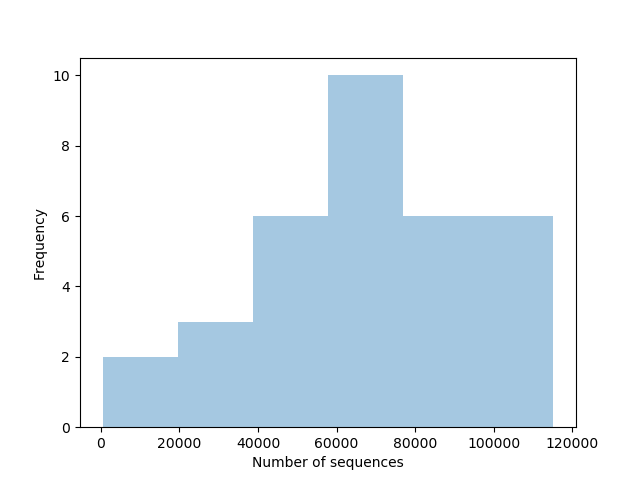

In [39]:
%matplotlib inline
import io
def load_summary_quality_plot(artifact_file, data_name):
    try:
        with ZipFile(artifact_file) as myzip:
            list_of_file_names = myzip.namelist()
            for file_name in list_of_file_names:
                if file_name.endswith(data_name):
                    if file_name.endswith('.html'):
                        my_output = myzip.read(file_name).decode("utf-8")
                    elif file_name.endswith('png'):
                        my_output = Image.open(io.BytesIO(myzip.read(file_name)))
                    break
    except (OSError, EOFError, BufferError) as e:
        print(e)
    finally:
        return(my_output)
sequence_quality_run1_file = './data/interim/QIIME2/tz_spt_cases/visualizations/rawQC/sequence-quality_run1.qzv'
sequence_quality_run1_html = load_summary_quality_plot(sequence_quality_run1_file, 'quality-plot.html')
display(HTML(sequence_quality_run1_html))

sequence_quality_run1_png = load_summary_quality_plot(sequence_quality_run1_file, 'demultiplex-summary.png')
display(sequence_quality_run1_png)

Visualization of the quality reports is limited from within this notebook, thus we visualized these files in [QIIME2view](https://view.qiime2.org/), and selected the following parameters for denoising with DADA2:

For `sequence-quality_run1.qzv`:
 - --p-trim-left-f 9
 - --p-trim-left-r 8
 - --p-trunc-len-f 293
 - --p-trunc-len-r 293
 
For `sequence-quality_run2.qzv`:
 - --p-trim-left-f 15
 - --p-trim-left-r 8
 - --p-trunc-len-f 298
 - --p-trunc-len-r 298
 
For `sequence-quality_run3.qzv`:
 - --p-trim-left-f 15
 - --p-trim-left-r 8
 - --p-trunc-len-f 298
 - --p-trunc-len-r 298

**Denoising with DADA2**

In [43]:
%%bash
mkdir -p ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/

time \
for imported_fastqs in $(ls ./data/interim/QIIME2/tz_spt_cases/artifacts/demux-paired-end_run*.qza); do
    tag="$(basename ${imported_fastqs} | cut -d. -f1 | cut -d_ -f2)";
    if [ "$tag" = "run1" ];then
        echo $tag; \
        singularity exec \
        --bind ${GROUP} \
        --app QIIME2 ./containers/meta16S.sif qiime dada2 denoise-paired \
            --i-demultiplexed-seqs ${imported_fastqs} \
            --p-trim-left-f 9 \
            --p-trim-left-r 8 \
            --p-trunc-len-f 293 \
            --p-trunc-len-r 293 \
            --o-table ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/table_${tag} \
            --o-representative-sequences ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/rep-seqs_${tag}.qza \
            --o-denoising-stats ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/denoising-stats_${tag}.qza \
            --p-n-threads 7
    else
        singularity exec \
        --bind ${GROUP} \
        --app QIIME2 ./containers/meta16S.sif qiime dada2 denoise-paired \
            --i-demultiplexed-seqs ${imported_fastqs} \
            --p-trim-left-f 15 \
            --p-trim-left-r 8 \
            --p-trunc-len-f 298 \
            --p-trunc-len-r 298 \
            --o-table ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/table_${tag} \
            --o-representative-sequences ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/rep-seqs_${tag}.qza \
            --o-denoising-stats ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/denoising-stats_${tag}.qza \
            --p-n-threads 7
    fi
done

run1
Saved FeatureTable[Frequency] to: ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/table_run2.qza
Saved FeatureData[Sequence] to: ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/rep-seqs_run2.qza
Saved SampleData[DADA2Stats] to: ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/denoising-stats_run2.qza
Saved FeatureTable[Frequency] to: ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/table_run3.qza
Saved FeatureData[Sequence] to: ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/rep-seqs_run3.qza
Saved SampleData[DADA2Stats] to: ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/denoising-stats_run3.qza


Plugin error from dada2:

  No features remain after denoising. Try adjusting your truncation and trim parameter settings.

Debug info has been saved to /tmp/qiime2-q2cli-err-4qakjjck.log

real	38m54.014s
user	157m8.404s
sys	3m0.249s


In [44]:
!cat /tmp/qiime2-q2cli-*.log

R version 3.5.1 (2018-07-02) 
Loading required package: Rcpp
DADA2: 1.10.0 / Rcpp: 1.0.2 / RcppParallel: 4.4.3 
1) Filtering The filter removed all reads: /tmp/tmp52djva80/filt_f/A00053_4_L001_R1_001.fastq.gz and /tmp/tmp52djva80/filt_r/A00053_37_L001_R2_001.fastq.gz not written.
The filter removed all reads: /tmp/tmp52djva80/filt_f/A00056_5_L001_R1_001.fastq.gz and /tmp/tmp52djva80/filt_r/A00056_38_L001_R2_001.fastq.gz not written.
The filter removed all reads: /tmp/tmp52djva80/filt_f/A00078_11_L001_R1_001.fastq.gz and /tmp/tmp52djva80/filt_r/A00078_44_L001_R2_001.fastq.gz not written.
The filter removed all reads: /tmp/tmp52djva80/filt_f/A00066_7_L001_R1_001.fastq.gz and /tmp/tmp52djva80/filt_r/A00066_40_L001_R2_001.fastq.gz not written.
The filter removed all reads: /tmp/tmp52djva80/filt_f/A00082_12_L001_R1_001.fastq.gz and /tmp/tmp52djva80/filt_r/A00082_45_L001_R2_001.fastq.gz not written.
The filter removed all reads: /tmp/tmp52djva80/filt_f/A00095_14_L001_R1_001.fastq.gz and /tmp

WARNING: Notice that no samples from run1 remained

**Inspect the denoising stats**

In [6]:
%%bash
mkdir -p ./data/interim/QIIME2/tz_spt_cases/visualizations/denoised
ls ./data/interim/QIIME2/tz_spt_cases/artifacts/denoised/denoising-stats_run*.qza | parallel \
    'tag="$(basename {} | cut -d. -f1 | cut -d_ -f2)"; \
    singularity exec \
        --bind ${GROUP} \
        --app QIIME2 ./containers/meta16S.sif \
        qiime metadata tabulate \
            --m-input-file {} \
            --o-visualization ./data/interim/QIIME2/tz_spt_cases/visualizations/denoised/denoising-stats_${tag}.qzv'

Saved Visualization to: ./data/interim/QIIME2/tz_spt_cases/visualizations/denoised/denoising-stats_run3.qzv
Saved Visualization to: ./data/interim/QIIME2/tz_spt_cases/visualizations/denoised/denoising-stats_run2.qzv


In [7]:
%%bash
unzip -l ./data/interim/QIIME2/tz_spt_cases/visualizations/denoised/denoising-stats_run3.qzv | head

Archive:  ./data/interim/QIIME2/tz_spt_cases/visualizations/denoised/denoising-stats_run3.qzv
  Length      Date    Time    Name
---------  ---------- -----   ----
       39  06-10-2020 17:22   210b2d4d-1115-43d1-bfd8-d5138b54793a/VERSION
     2612  06-10-2020 17:22   210b2d4d-1115-43d1-bfd8-d5138b54793a/checksums.md5
       76  06-10-2020 17:22   210b2d4d-1115-43d1-bfd8-d5138b54793a/metadata.yaml
       39  06-10-2020 17:22   210b2d4d-1115-43d1-bfd8-d5138b54793a/provenance/VERSION
       76  06-10-2020 17:22   210b2d4d-1115-43d1-bfd8-d5138b54793a/provenance/metadata.yaml
     2723  06-10-2020 17:22   210b2d4d-1115-43d1-bfd8-d5138b54793a/provenance/citations.bib
       39  06-10-2020 17:22   210b2d4d-1115-43d1-bfd8-d5138b54793a/provenance/artifacts/11b8e846-005a-45dc-8450-a6e9664a10a4/VERSION


In [10]:
def load_denoising_stats(artifact_file):
    try:
        with ZipFile(artifact_file) as myzip:
            list_of_file_names = myzip.namelist()
            for file_name in list_of_file_names:
                if file_name.endswith('metadata.tsv'):
                    with myzip.open(file_name) as my_file:
                        denoising_stats= pd.read_csv(my_file, sep='\t', comment='#')
                    break
    except (OSError, EOFError, BufferError) as e:
        print(e)
    finally:
        return(denoising_stats)

# Load Denoising stats for run2
denoising_stats_run2_file = './data/interim/QIIME2/tz_spt_cases/visualizations/denoised/denoising-stats_run2.qzv'
denoising_stats_run2 = load_denoising_stats(denoising_stats_run2_file)
denoising_stats_run2['perc_kept'] = (denoising_stats_run2['non-chimeric']/denoising_stats_run2.input)*100

# Load Denoising stats for run3
denoising_stats_run3_file = './data/interim/QIIME2/tz_spt_cases/visualizations/denoised/denoising-stats_run3.qzv'
denoising_stats_run3 = load_denoising_stats(denoising_stats_run3_file)
denoising_stats_run3['perc_kept'] = (denoising_stats_run3['non-chimeric']/denoising_stats_run3.input)*100

In [11]:
# 
print(denoising_stats_run2['perc_kept'].describe())
print(denoising_stats_run3['perc_kept'].describe())

count    191.000000
mean       4.989457
std        1.335542
min        0.166699
25%        4.185992
50%        5.004761
75%        5.773623
max        9.069372
Name: perc_kept, dtype: float64
count    111.000000
mean      12.954821
std        2.262477
min        6.368255
25%       11.703380
50%       12.986372
75%       14.291017
max       19.767079
Name: perc_kept, dtype: float64


NOTE: More than 90\% percent of the data is lost. So instead of using paired-end data. We are only going to use the forward reads, because they have better quality!